<a href="https://colab.research.google.com/github/ManuChandana/AI-ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [ ]:
# Load the dataset
data = pd.read_csv("/content/Housing.csv")

In [ ]:
# Display dataset overview
print("Dataset Overview:")
print(data.head())
print("\nColumns with null values:", data.isnull().sum().sum())

Dataset Overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Columns with null values: 0


In [ ]:
# Encode categorical features
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
# Separate features and target
X = data.drop(columns=['price'])
y = data['price']

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset for classification and regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# ---- Classification Task ----
# Convert `price` into a binary target for classification
median_price = np.median(y_train)
y_train_class = (y_train > median_price).astype(int)
y_test_class = (y_test > median_price).astype(int)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        86
           1       0.82      0.78      0.80        78

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164



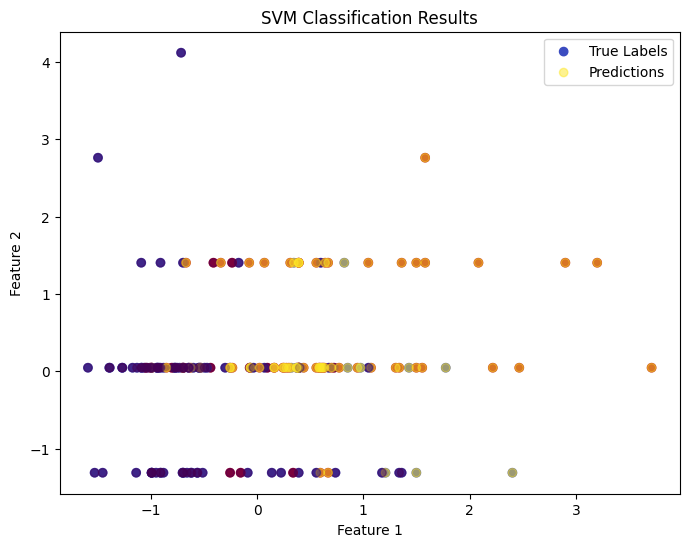

In [ ]:
# ---- Classification Task ----
# Convert `price` into a binary target for classification
median_price = np.median(y_train)
y_train_class = (y_train > median_price).astype(int)
y_test_class = (y_test > median_price).astype(int)

# Train SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train_class)

# Evaluate Classifier
y_pred_class = svm_classifier.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

# Plot Classification Results
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_class, cmap='coolwarm', label="True Labels")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_class, cmap='viridis', alpha=0.5, label="Predictions")
plt.title("SVM Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Regression Mean Squared Error: 4462179676605.51


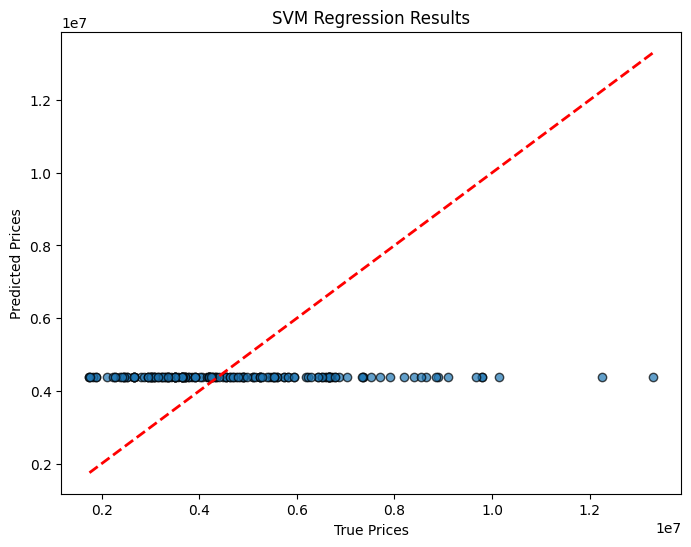

In [ ]:
# ---- Regression Task ----
# Train SVM Regressor
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)

# Evaluate Regressor
y_pred_reg = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"\nRegression Mean Squared Error: {mse:.2f}")

# Plot Regression Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.7, edgecolor='k')
plt.title("SVM Regression Results")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()